# 3. Supplementary Figure 1

This notebook is used to create the panels of Supplementary Figure 1.

Before starting, use 1.Preprocessing notebook to generate:
- SC1_normalized.h5ad - Normalized single-cell data

Download data available at Metabolights [www.ebi.ac.uk/metabolights/MTBLS11236], study identifier MTBLS11236 and move to data folder:
- SC1_FDR.csv - FDR data downloaded from METASPACE project Delafiori  et al. (2024) [https://metaspace2020.eu/project/HTSpaceM]
- SC1_metabolite_IDs.csv - Metabolite metadata

In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import scanpy as sc
from anndata import read_h5ad

### Set plot style

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats=['retina']
sns.set(rc={'figure.figsize':(5, 5),
            'legend.frameon':False},
        style='ticks',
        context='talk')

# Render figures with higher resolution.
plt.rcParams['figure.dpi']=200
# Save with transparent regions white background.
plt.rcParams['savefig.facecolor']='white'

### Create color palette

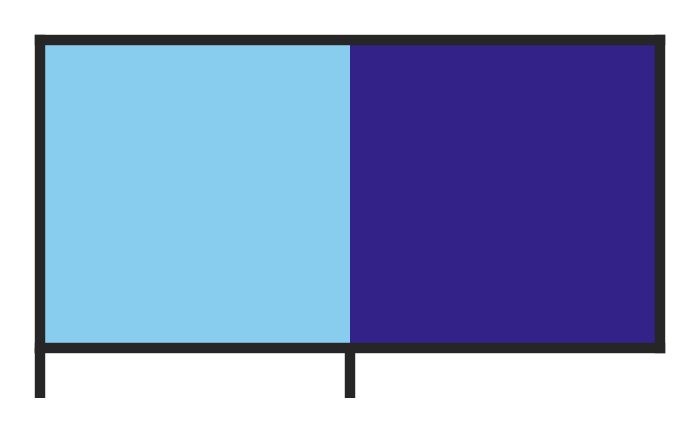

In [3]:
#color palette
palette = [(136,204,238),(51,34,136)]
palette = [(e[0]/255.0, e[1]/255.0, e[2]/255.0) for e in palette]
cmap = ListedColormap(palette)
sns.color_palette(palette=None,as_cmap=True)
sns.palplot(palette)

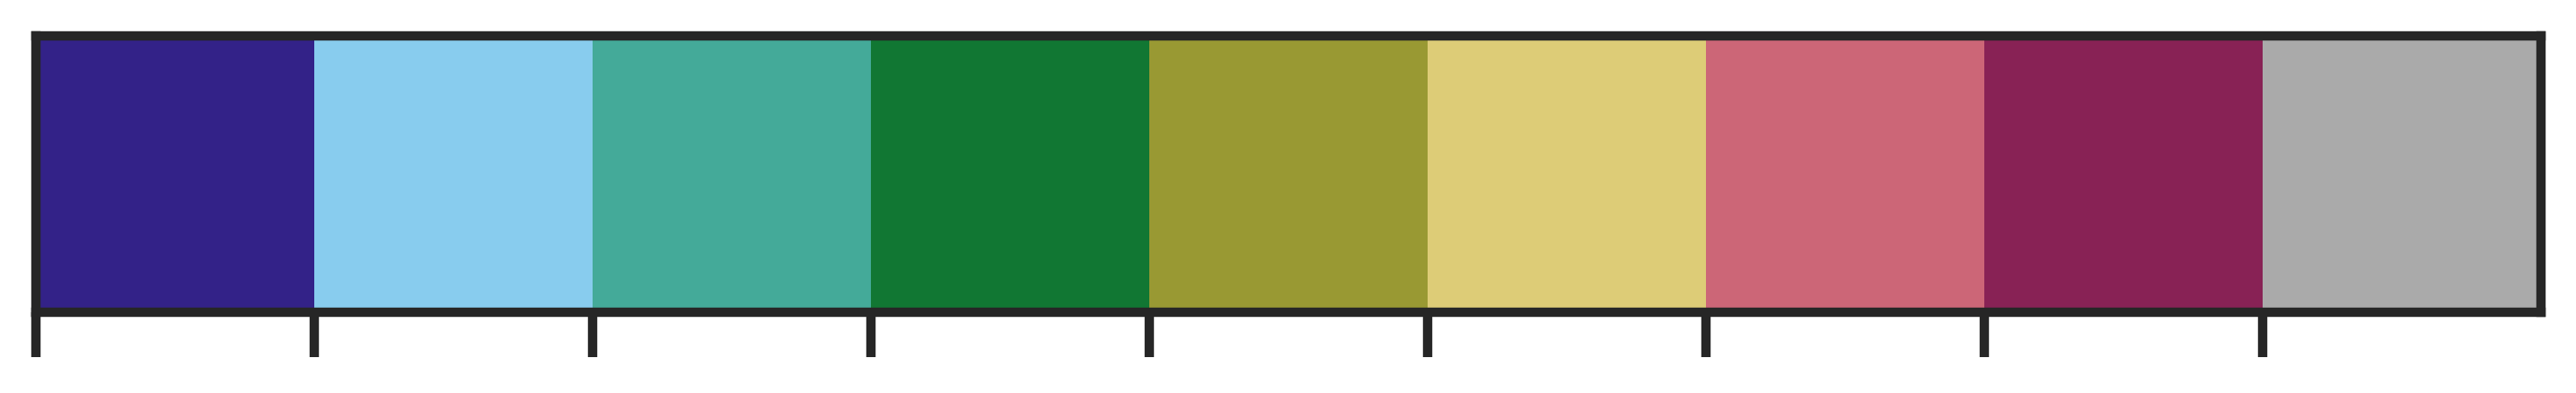

In [4]:
#color palette
palette2 = [(51,34,136),(136,204,238),(68,170,153),(17,119,51),(153,153,51),(221,204,119),(204,102,119),(136,34,85),(170,170,170)]
palette2 = [(e[0]/255.0, e[1]/255.0, e[2]/255.0) for e in palette2]
cmap = ListedColormap(palette2)
sns.color_palette(palette=None,as_cmap=True)
sns.palplot(palette2)

## Panel A

### Set paths

In [5]:
#input
data_dir = Path(r'../data')
FDR_path = data_dir / 'SC1_FDR.csv'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_1'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [6]:
# FDR values downloaded from METASPACE project 'Delafiori et al. (2024)'
FDR = pd.read_csv(FDR_path)
FDR = FDR.astype(str).groupby(['datasetKey', 'CellLine', 'fdr'])['fdr'].count().unstack().fillna(0).astype(int)
FDR.columns.name = None

#ccomputing cumulative FDR
FDR['0.1'] = FDR['0.05'] + FDR['0.1']
FDR['0.2'] = FDR['0.1'] + FDR['0.2']
FDR['0.5'] = FDR['0.2'] + FDR['0.5']

### Histogram and Boxplot
#### FDR5%

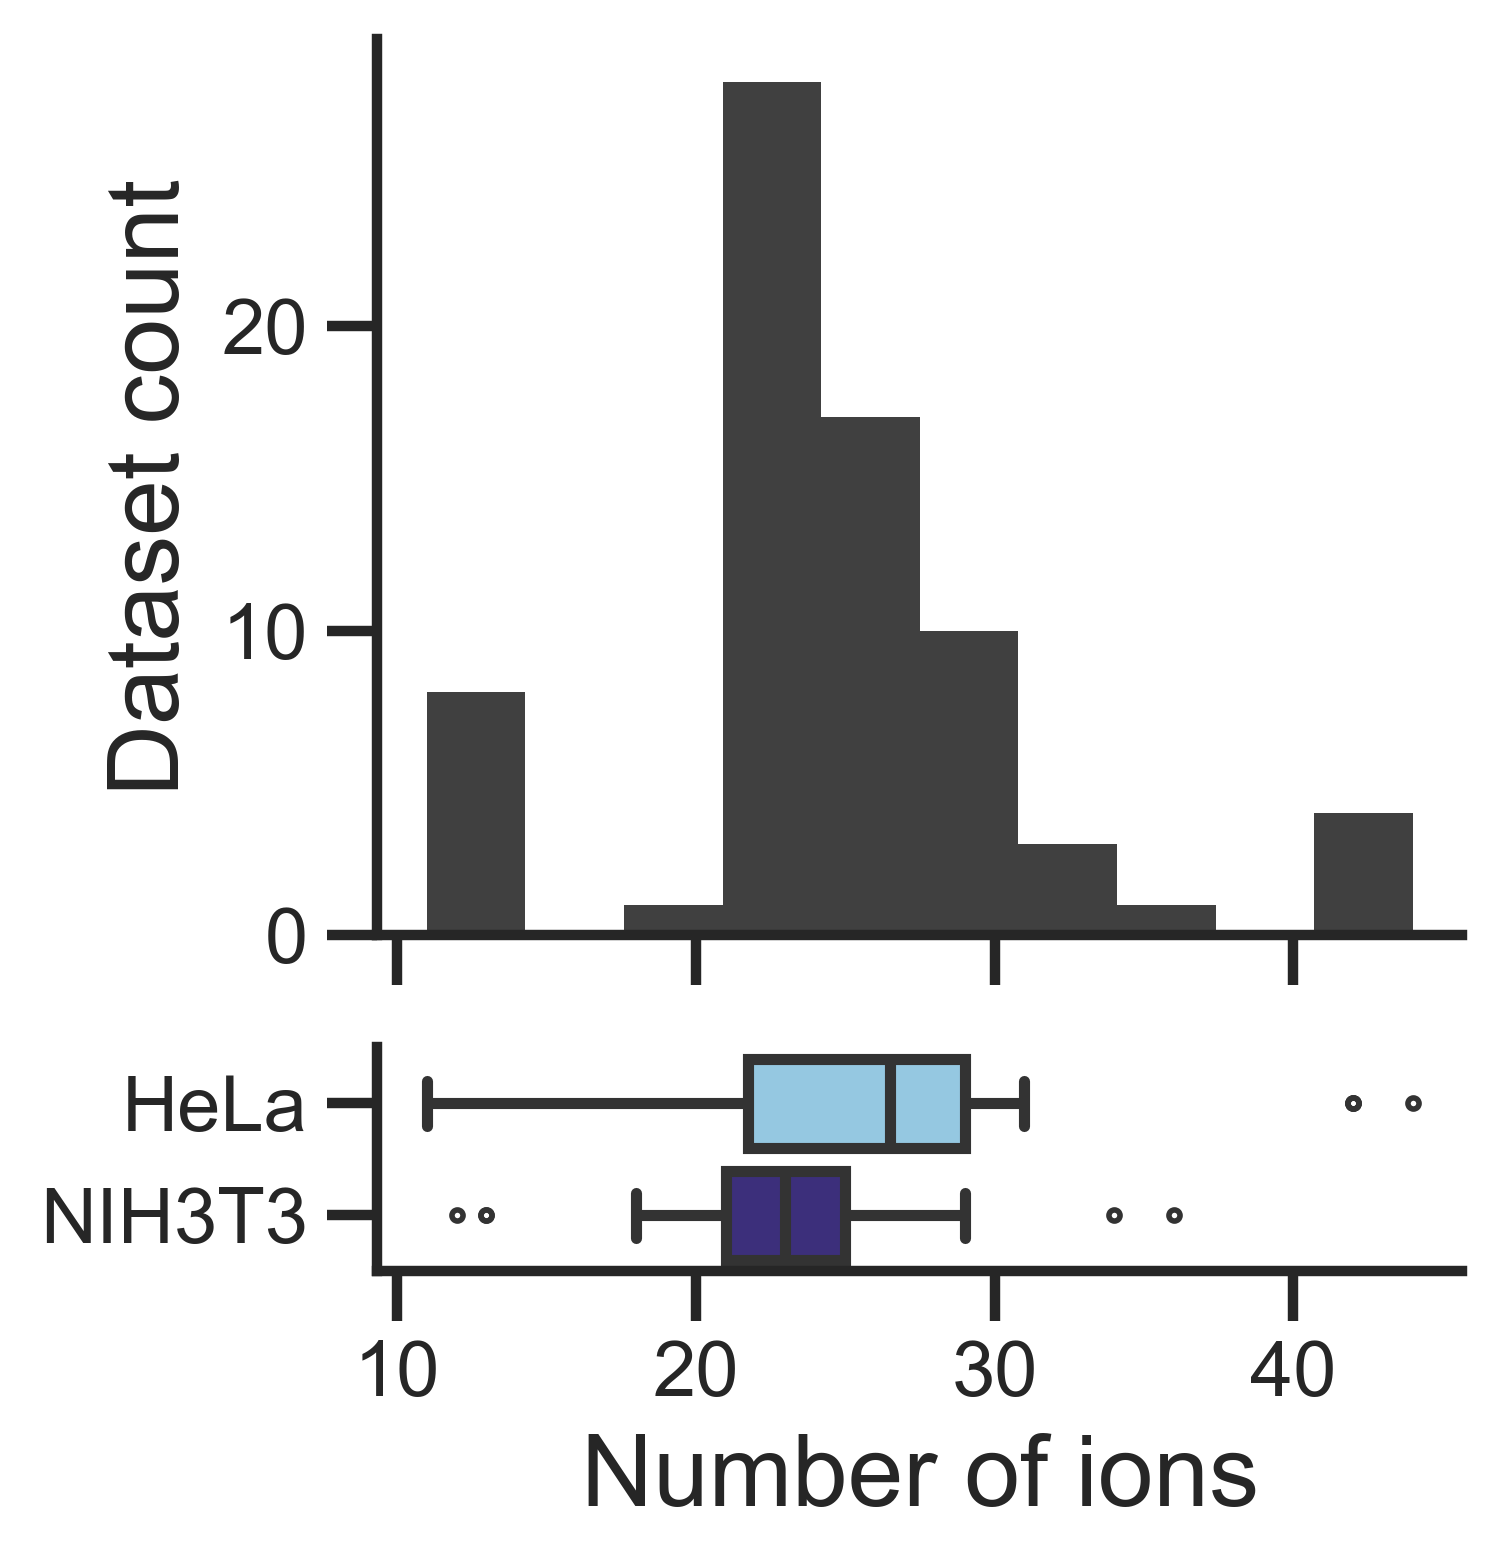

In [7]:
f = plt.figure(figsize=(3.5, 4))
# Defining a gridspec where the subplots are placed
gs = f.add_gridspec(2, 1, height_ratios=(4,1))
ax_down = f.add_subplot(gs[1, 0])
ax_main = f.add_subplot(gs[0, 0], sharex=ax_down)

sns.histplot(data=FDR, 
            x='0.05', 
            bins=10, 
            linewidth=0, 
            color='Black',
            legend=False,
            ax=ax_main)

sns.boxplot(data=FDR, 
            x='0.05', 
            y='CellLine', 
            palette=palette[0:2],
            fliersize=2,
            hue='CellLine',
            linewidth=2,
            hue_order=['HeLa', 'NIH3T3'],
            orient='h',
            legend=False,
            ax=ax_down)

ax_main.set_ylabel('Dataset count', fontsize=18)
ax_main.tick_params('both', labelsize=14)
ax_main.set_xlabel(' ')
ax_down.tick_params('both', labelsize=14)
ax_down.set_ylabel('')
ax_down.set_xlabel(u'Number of ions', fontsize=18)
plt.setp(ax_main.get_xticklabels(), visible=False)
plt.setp(ax_down.get_xticklabels(minor=True), visible=True)
sns.despine(offset=0, trim=False, ax=ax_down)
sns.despine(trim=False, ax=ax_main)

plt.savefig(plots_path / 'panel_A_FRD5.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_A_FDR5.svg', bbox_inches='tight')

#### FDR20%

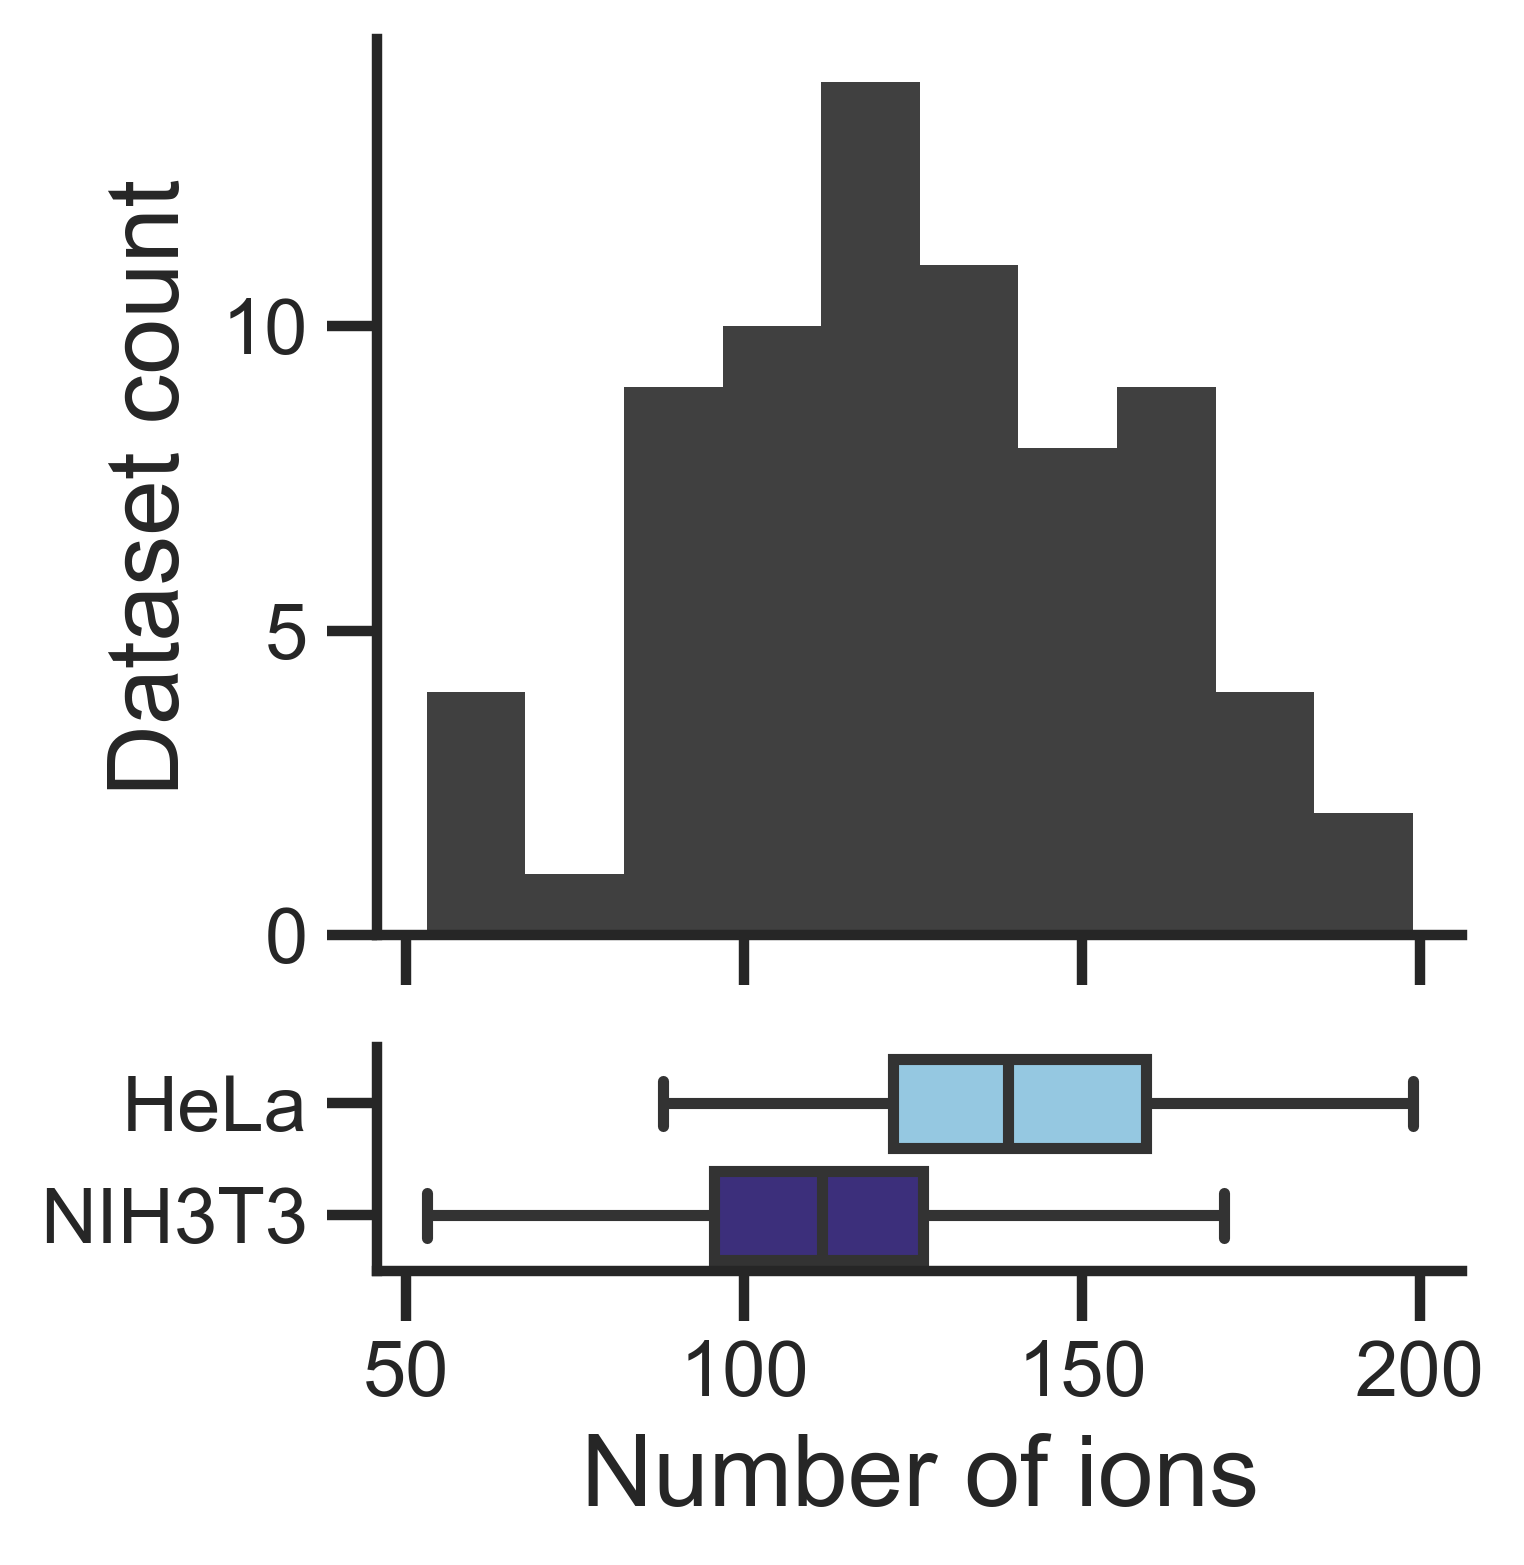

In [8]:
f = plt.figure(figsize=(3.5, 4))
# Defining a gridspec where the subplots are placed
gs = f.add_gridspec(2, 1, height_ratios=(4,1))
ax_down = f.add_subplot(gs[1, 0])
ax_main = f.add_subplot(gs[0, 0], sharex=ax_down)

sns.histplot(data=FDR, 
            x='0.2', 
            bins=10, 
            linewidth=0, 
            color='Black',
            legend=False,
            ax=ax_main)

sns.boxplot(data=FDR, 
            x='0.2', 
            y='CellLine', 
            palette=palette[0:2],
            fliersize=2,
            hue='CellLine',
            linewidth=2,
            hue_order=['HeLa', 'NIH3T3'],
            orient='h',
            legend=False,
            ax=ax_down)

ax_main.set_ylabel('Dataset count', fontsize=18)
ax_main.tick_params('both', labelsize=14)
ax_main.set_xlabel(' ')
ax_down.tick_params('both', labelsize=14)
ax_down.set_ylabel('')
ax_down.set_xlabel(u'Number of ions', fontsize=18)
plt.setp(ax_main.get_xticklabels(), visible=False)
plt.setp(ax_down.get_xticklabels(minor=True), visible=True)
sns.despine(offset=0, trim=False, ax=ax_down)
sns.despine(trim=False, ax=ax_main)

plt.savefig(plots_path / 'panel_A_FRD20.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_A_FDR20.svg', bbox_inches='tight')

#### FDR50%

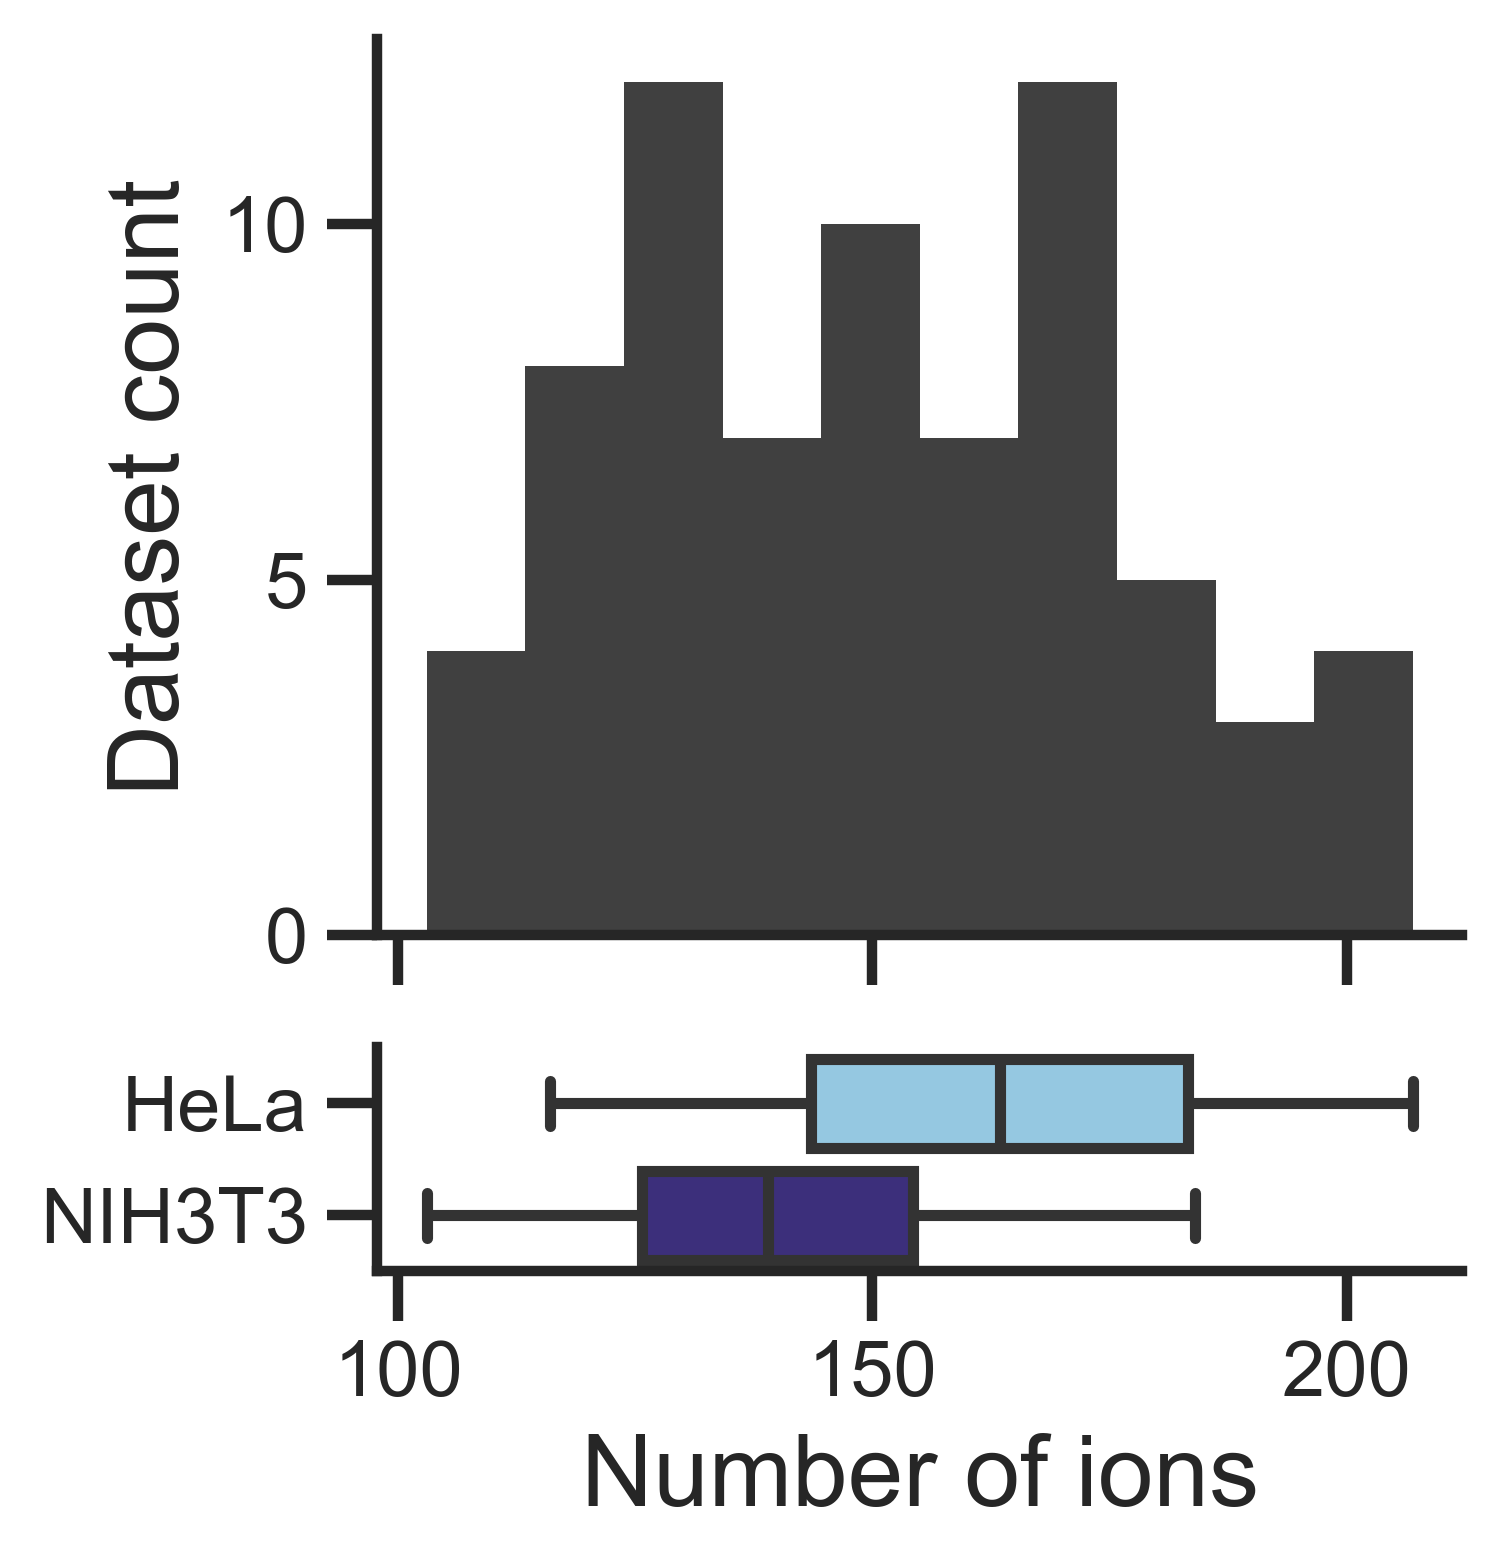

In [9]:
f = plt.figure(figsize=(3.5, 4))
# Defining a gridspec where the subplots are placed
gs = f.add_gridspec(2, 1, height_ratios=(4,1))
ax_down = f.add_subplot(gs[1, 0])
ax_main = f.add_subplot(gs[0, 0], sharex=ax_down)

sns.histplot(data=FDR, 
            x='0.5', 
            bins=10, 
            linewidth=0, 
            color='Black',
            legend=False,
            ax=ax_main)

sns.boxplot(data=FDR, 
            x='0.5', 
            y='CellLine', 
            palette=palette[0:2],
            fliersize=2,
            hue='CellLine',
            linewidth=2,
            hue_order=['HeLa', 'NIH3T3'],
            orient='h',
            legend=False,
            ax=ax_down)

ax_main.set_ylabel('Dataset count', fontsize=18)
ax_main.tick_params('both', labelsize=14)
ax_main.set_xlabel(' ')
ax_down.tick_params('both', labelsize=14)
ax_down.set_ylabel('')
ax_down.set_xlabel(u'Number of ions', fontsize=18)
plt.setp(ax_main.get_xticklabels(), visible=False)
plt.setp(ax_down.get_xticklabels(minor=True), visible=True)
sns.despine(offset=0, trim=False, ax=ax_down)
sns.despine(trim=False, ax=ax_main)

plt.savefig(plots_path / 'panel_A_FRD50.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_A_FDR50.svg', bbox_inches='tight')

## Panel B

### Set paths

In [10]:
#input
data_dir = Path(r'../data')
metabolite_path = data_dir / 'SC1_metabolite_IDs.csv'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_1'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [11]:
metabolite_class = pd.read_csv(metabolite_path)

In [12]:
subclass_order = ['Amino acids',
                  'Amino acids derivatives',
                  'N-acyl amino acids',
                  'Dipeptides',
                  'Lipids and lipid-like molecules',
                  'Carbohydrates and carbohydrate conjugates',
                  'Nucleosides, nucleotides, and analogs',
                  'Hydroxy acids, keto acids, carboxylic acids, and derivatives',
                  'Purines, pyrimidines, and derivatives',
                  'Inorganic phosphates, organic phosphates, and derivatives',
                  'Vitamins and cofactors',
                  'Others']

In [13]:
#Filtering for metabolites present in both single-cell (SC) and LC-MS/MS (Bulk) data
SCBulk_subclass = metabolite_class[(metabolite_class['detection']=='SC-Bulkneg-Bulkpos')|
                                   (metabolite_class['detection']=='SC-Bulkneg')|
                                   (metabolite_class['detection']=='SC-Bulkpos')]
SCBulk_subclass = SCBulk_subclass.groupby(['subclass', 'class'])['subclass'].count()
SCBulk_subclass = SCBulk_subclass.to_frame(name='SC-Bulk').reset_index().rename(columns={'index':'subclass'})

#Filtering for metabolites present in SC data only
SC_subclass = metabolite_class[(metabolite_class['detection']=='SC')]
SC_subclass = SC_subclass.groupby(['subclass','class'])['subclass'].count()
SC_subclass = SC_subclass.to_frame(name='SC').reset_index().rename(columns = {'index':'subclass'})

#Filtering for metabolites present in Bulk data only
Bulk_subclass = metabolite_class[(metabolite_class['m/z']=='btw100-400')&
                                 (metabolite_class['detection']=='Bulkneg-Bulkpos')|
                                 (metabolite_class['detection']=='Bulkneg')|
                                 (metabolite_class['detection']=='Bulkpos')]
Bulk_subclass = Bulk_subclass.groupby(['subclass', 'class'])['subclass'].count()
Bulk_subclass = Bulk_subclass.to_frame(name='Bulk').reset_index().rename(columns={'index':'subclass'})

#merge datasets
subclass = SCBulk_subclass.merge(SC_subclass, how='outer', 
                                 on=['class','subclass']).merge(Bulk_subclass, how='outer', 
                                                                on=['class','subclass']).fillna(0)
                                                                                            
# Convert the column to categorical with the specific order
subclass['subclass'] = pd.Categorical(subclass['subclass'], categories=subclass_order, ordered=True)

# Sort the DataFrame based on the categorical order
dic = {'SC-Bulk':int, 'SC':int, 'Bulk':int}
subclass = subclass.sort_values(by='subclass').reindex().astype(dic)

### Barplot

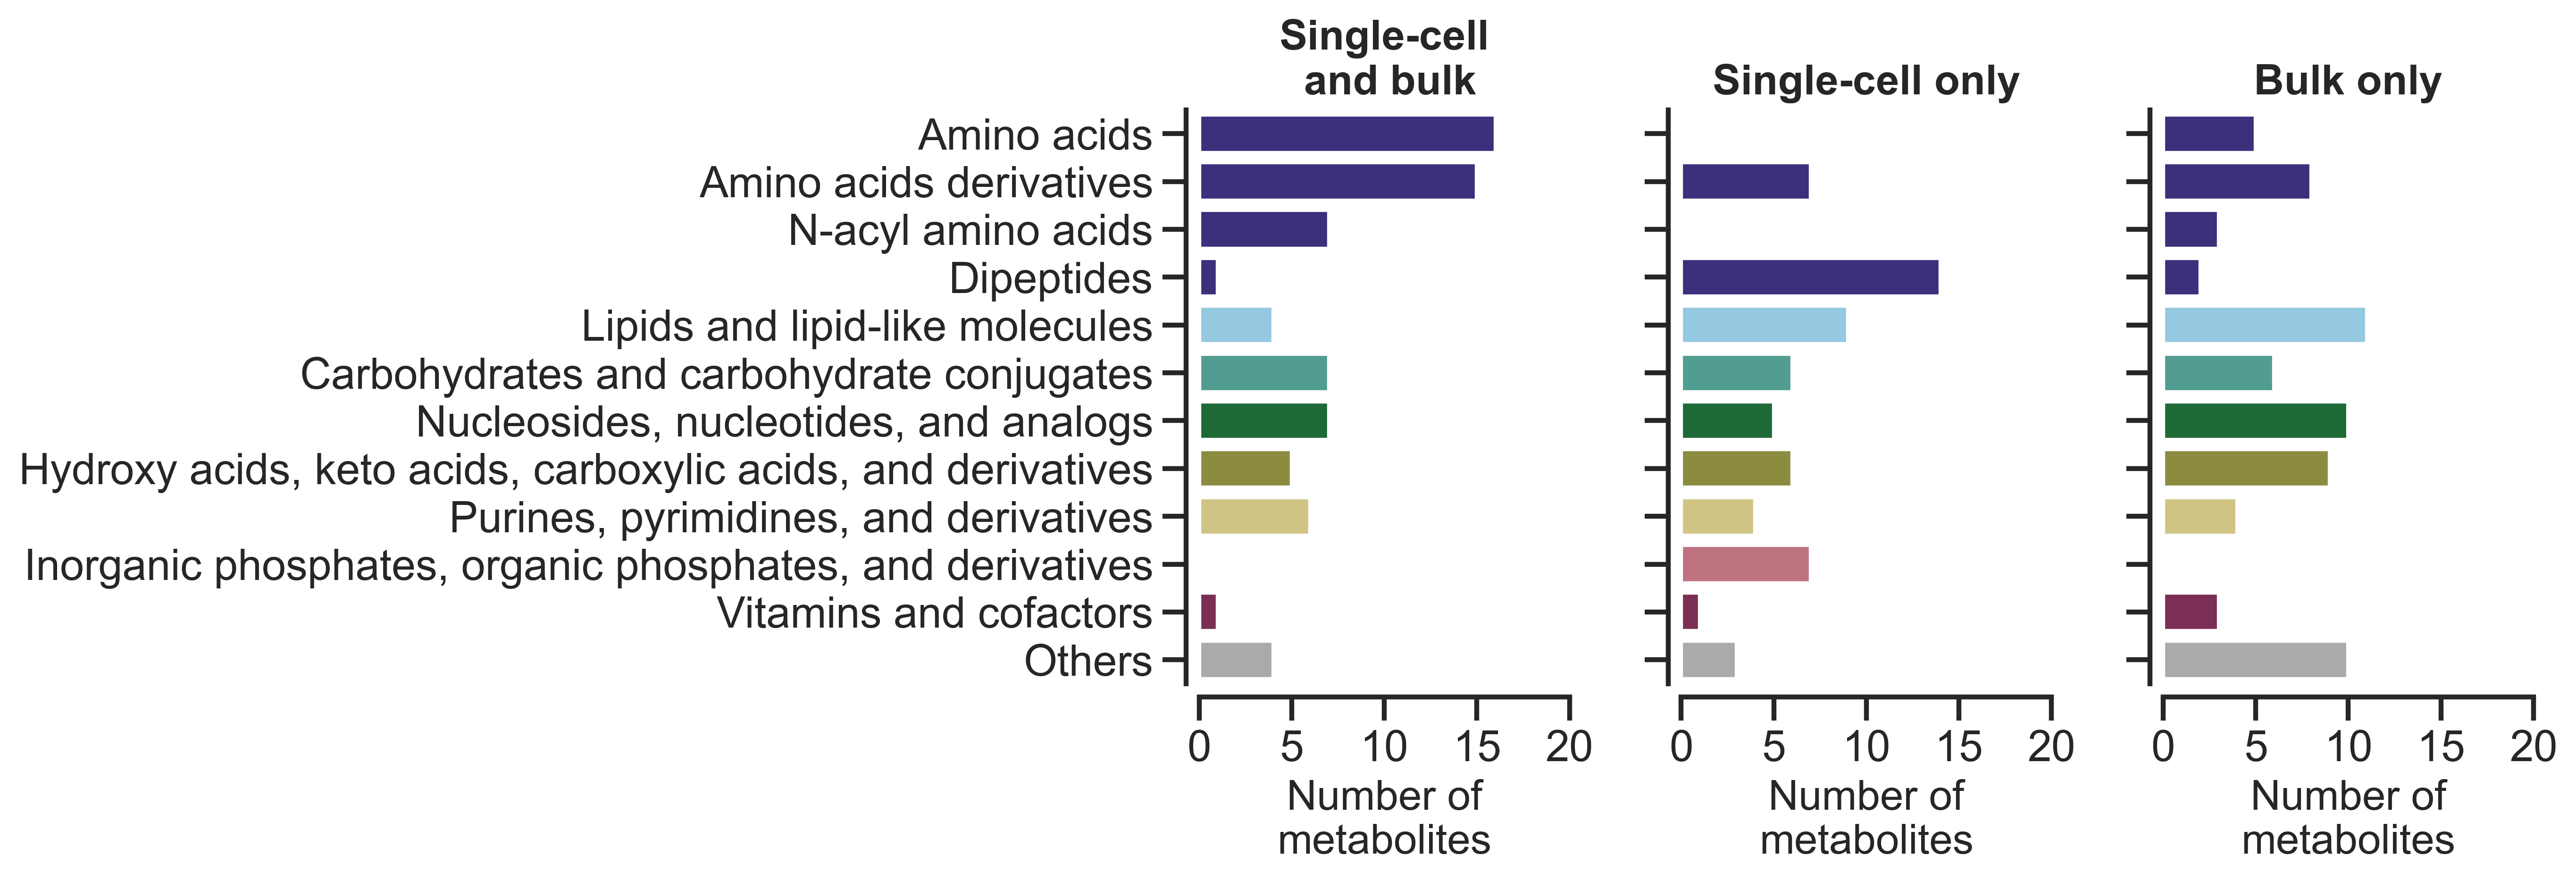

In [14]:
f=plt.figure(figsize=(14, 5))
# Defining a gridspec where the subplots are places
gs=f.add_gridspec(nrows=1, ncols=3)
ax_main=f.add_subplot(gs[0, 0])
ax_middle=f.add_subplot(gs[0, 1], sharey=ax_main)
ax_right=f.add_subplot(gs[0, 2], sharey=ax_main)

sns.barplot(data=subclass,
            x='SC-Bulk',
            y='subclass',
            orient='h',
            hue='class',
            palette=palette2,
            legend=False,
            ax=ax_main)
sns.barplot(data=subclass,
            x='SC',
            y='subclass',
            orient='h',
            hue='class',
            palette=palette2,
            legend=False,
            ax=ax_middle)
sns.barplot(data=subclass,
            x='Bulk',
            y='subclass',
            orient='h',
            hue='class',
            palette=palette2,
            legend=False,
            ax=ax_right)

sns.despine(offset=5,trim=False,  ax=ax_right)
sns.despine(offset=5,trim=False,  ax=ax_middle)
sns.despine(trim=False, offset = 5, ax=ax_main)
plt.setp(ax_main.get_yticklabels(minor = True), visible=True)
plt.setp(ax_middle.get_yticklabels(minor = False), visible=False)
plt.setp(ax_right.get_yticklabels(minor=False), visible=False)

ax_main.grid(False)
ax_middle.grid(False)
ax_right.grid(False)
ax_main.set_ylabel('')
ax_main.set_xlabel('Number of\nmetabolites', fontsize=16)
ax_main.set_title('Single-cell\n and bulk', fontsize=16, weight='bold', y=1)
ax_middle.set_ylabel('')
ax_middle.set_xlabel('Number of\nmetabolites', fontsize=16)
ax_middle.set_title('Single-cell only', fontsize=16, weight='bold', y=1)
ax_right.set_ylabel('')
ax_right.set_xlabel('Number of\nmetabolites', fontsize=16)
ax_right.set_title('Bulk only', fontsize=16, weight='bold', y=1)
plt.yticks(fontsize=20)
ax_main.set_xticks(ticks=[0,5,10,15,20])
ax_middle.set_xticks(ticks=[0,5,10,15,20])
ax_right.set_xticks(ticks=[0,5,10,15,20])
plt.tight_layout()

plt.savefig(plots_path / 'panel_B.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_B.svg', bbox_inches='tight')

## Panel C

### Set paths

In [15]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC1_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_1'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [16]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

#calculate cell size
adata.obs['cell_area_um2'] = adata.obs['cell_area'] * (0.64**2) #pixel size

### Violin plot

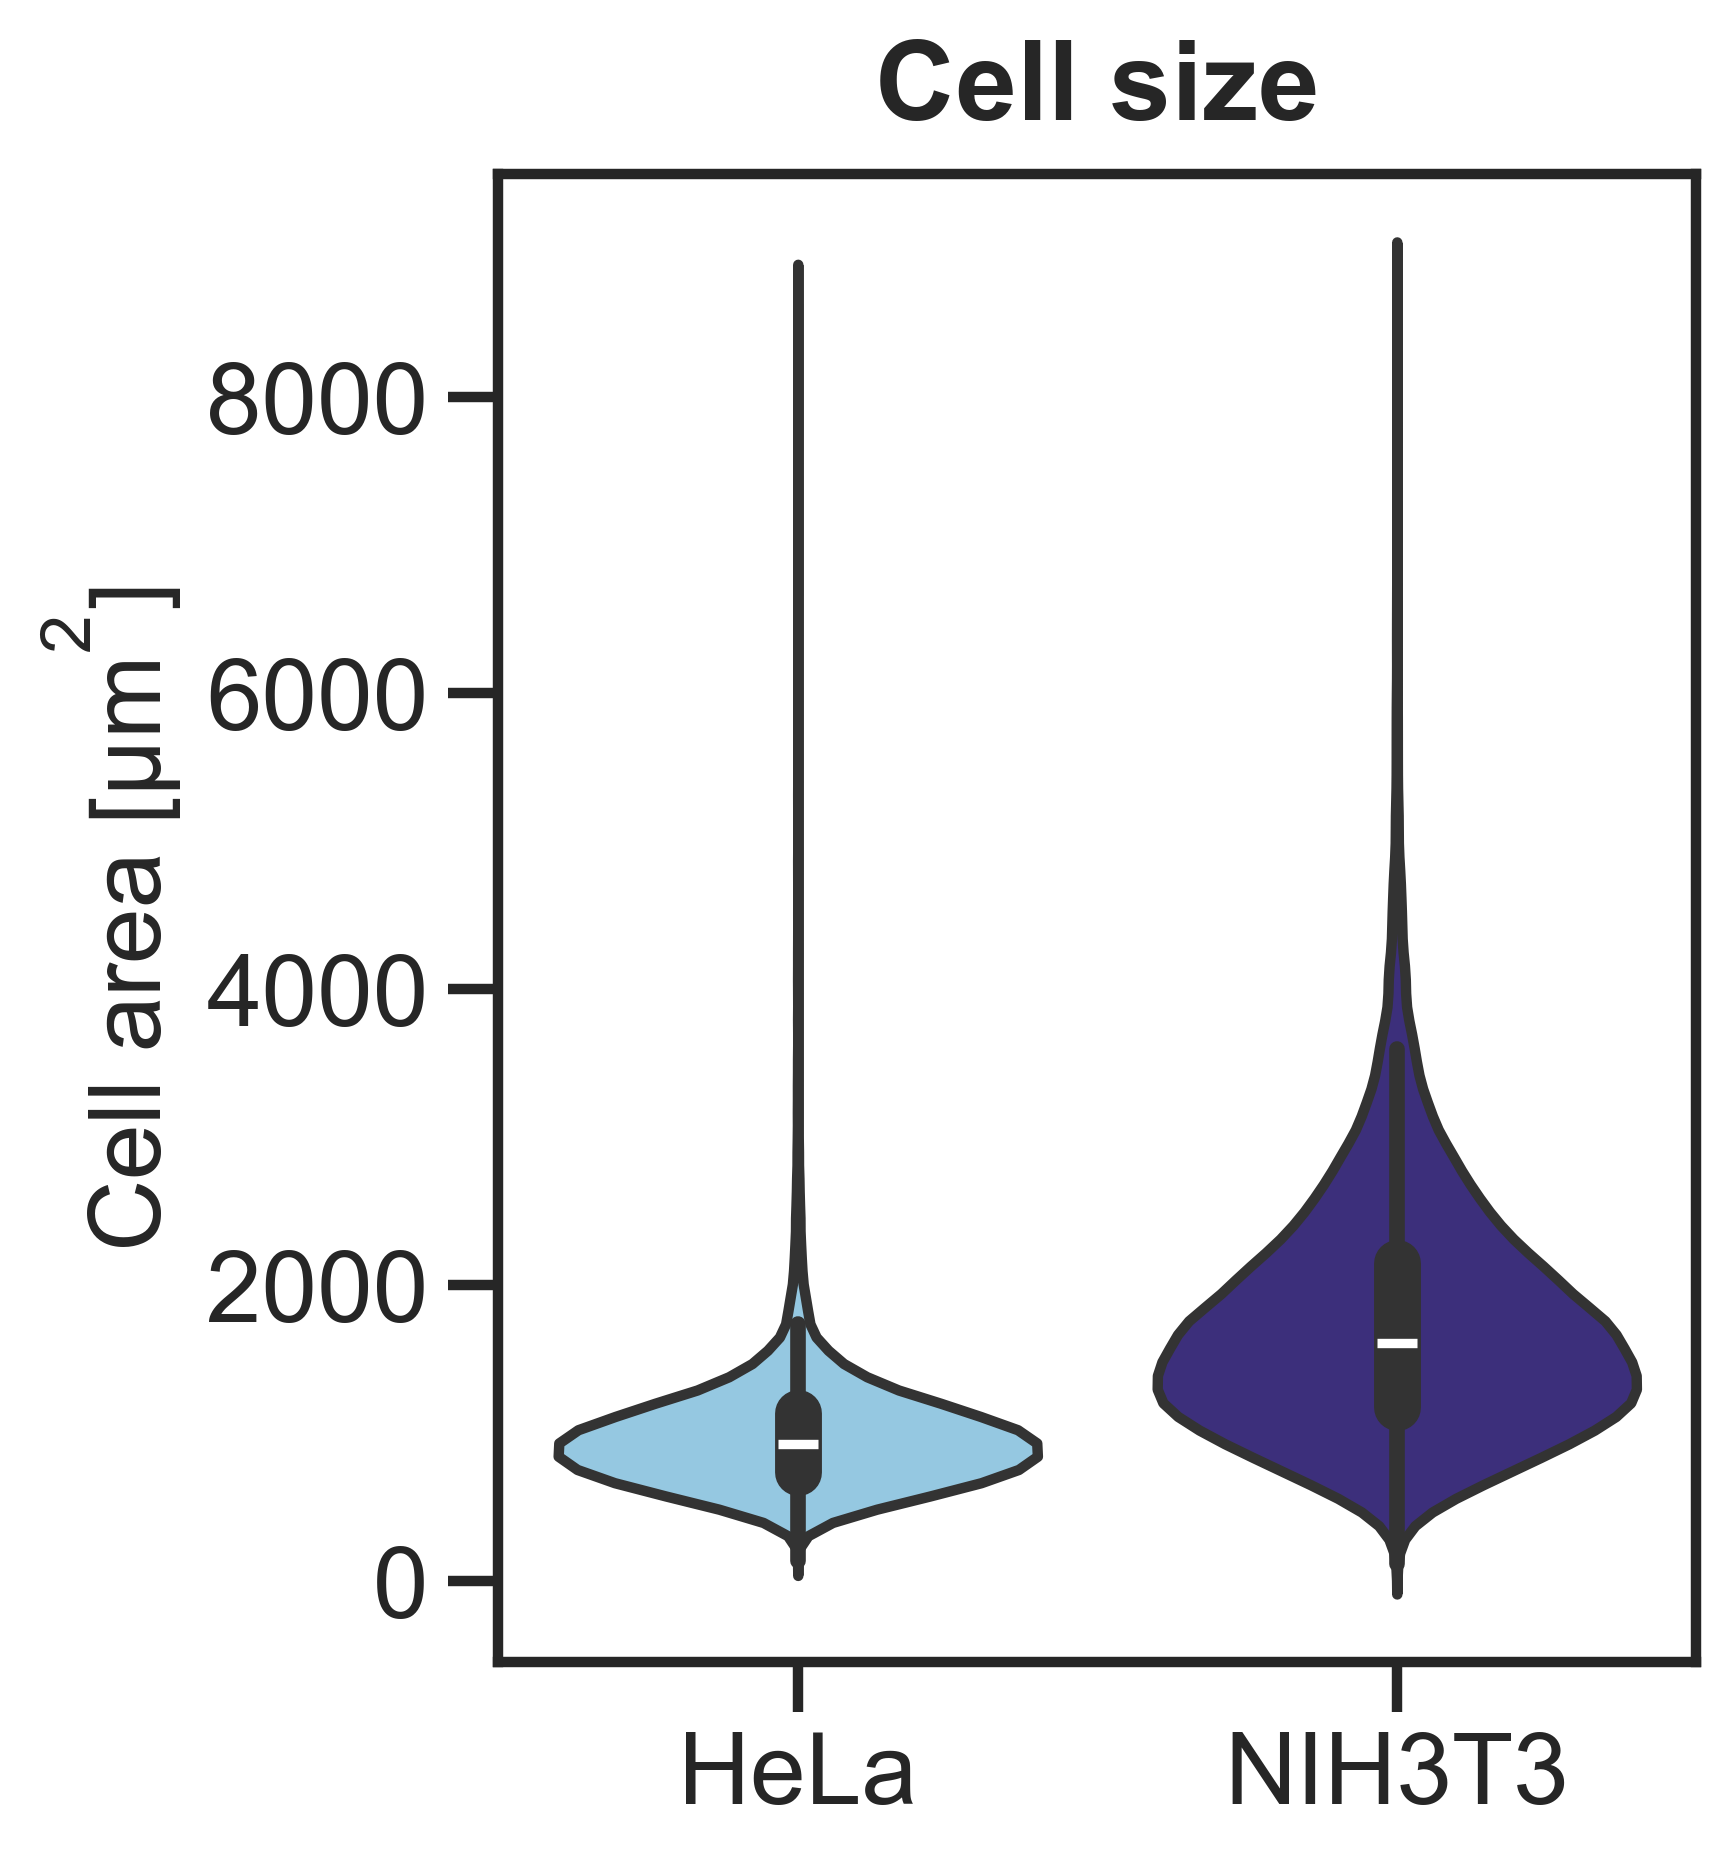

In [17]:
plt.figure(figsize=(4.7,5))
p = sns.violinplot(x='CellLine', 
                   y='cell_area_um2', 
                   data=adata.obs, 
                   hue='CellLine',
                   hue_order=['HeLa', 'NIH3T3'],
                   palette=palette[0:2], 
                   legend=False)

plt.ylabel(r'Cell area [$\mathregular{\mu m^2}$]')
plt.xlabel('')
plt.title('Cell size', size=20, ha='center', va='bottom', weight='bold')
p.tick_params(axis='both', labelsize=18)
plt.tight_layout()

plt.savefig(plots_path / 'panel_C.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_C.svg', bbox_inches='tight')